# More interesting fits

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import pyobs
import numpy

pyobs.set_verbose('mfit') # prints additional information

We create synthetic data for a free-field scalar correlation function in $D=1+1$ with $T=16$

In [3]:
T=16
L=16
mass=0.25
corr_ex = [pyobs.qft.free_scalar.Cphiphi(t,mass,0.0,T,L) for t in range(T//2+1)]
cov_ex = pyobs.qft.free_scalar.cov_Cphiphi(mass,0.0,T,L)[0:T//2+1,0:T//2+1]

In [4]:
cov_ex[0,:]

array([2.35814989, 2.3103782 , 2.204215  , 2.0748116 , 1.94580408,
       1.83277329, 1.74569634, 1.69063532, 1.67083519])

<IPython.core.display.Javascript object>


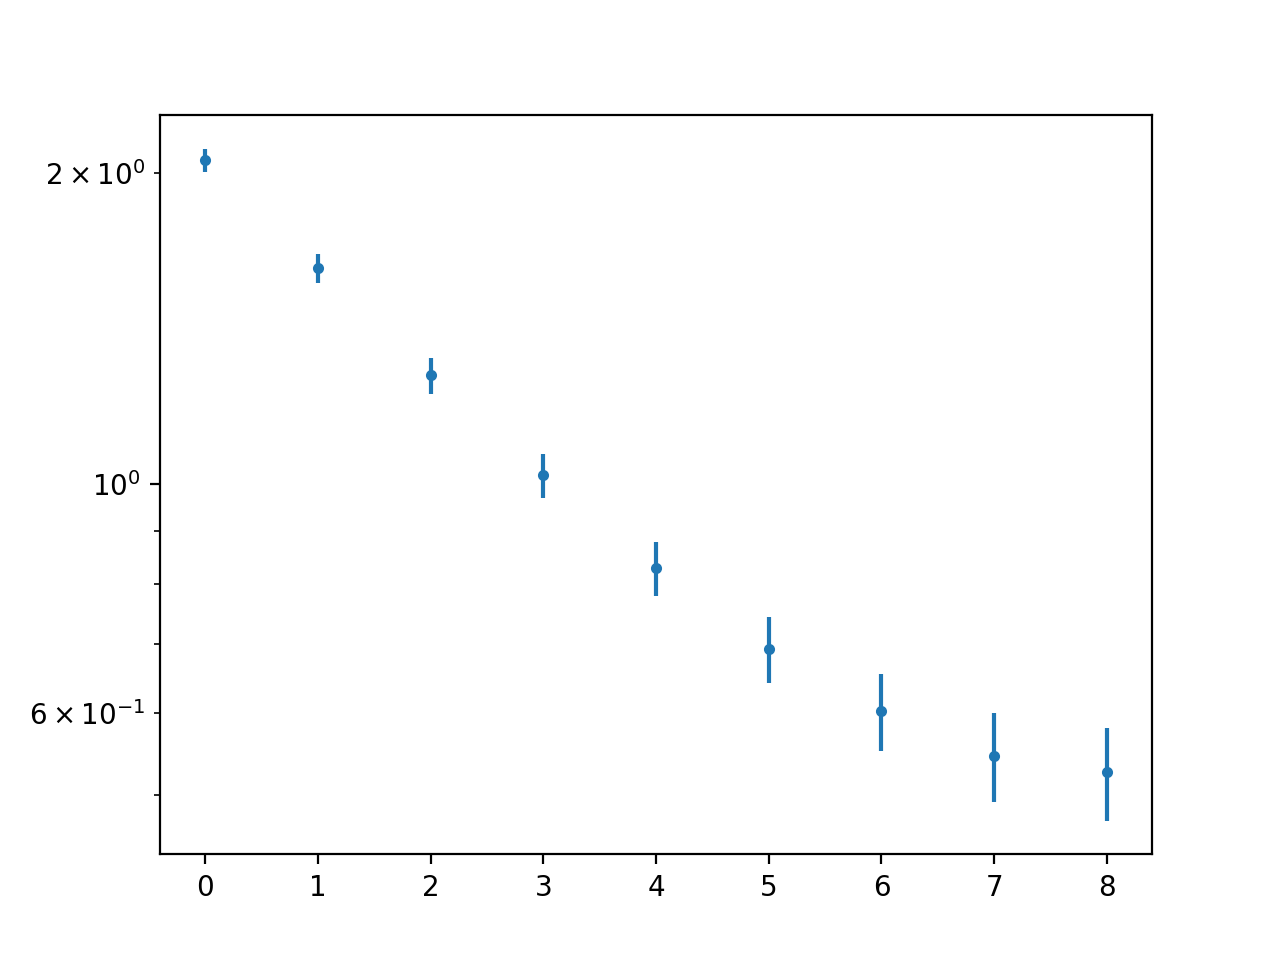

In [5]:
tau=4.0
N=6000

data = pyobs.random.acrandn(corr_ex,cov_ex,tau,N)
data = numpy.reshape(data, (numpy.size(data),))

corr=pyobs.obs()
corr.create('obsA',data,dims=(T//2+1,))

plt.figure()
[y,dy] = corr.error()
xax=numpy.arange(T//2+1)
plt.errorbar(xax,y,dy,fmt='.')
plt.yscale('log')

From the same sub-package, `pyobs.qft.free_scalar` we obtain the explicit analytic expression for the function used before, which we pass to `diff` to compute automatically the gradient with respect to the mass, our fitting parameter.

In [6]:
fit_func = pyobs.qft.free_scalar.Cphiphi_string('t','m',0,T,L=16)
print(fit_func)

[f1, df1, _] = pyobs.diff(fit_func,'t','m')

(exp(-acosh(0.5*m**2 + 2*sin(0.0)**2+1)*abs(t)) + exp(-acosh(0.5*m**2 + 2*sin(0.0)**2+1)*abs(16-t)) + exp(-acosh(0.5*m**2 + 2*sin(0.0)**2+1)*abs(16+t)))/(2*sinh(acosh(0.5*m**2 + 2*sin(0.0)**2+1)))


Now we create one instance of the `mfit` class. For the metric of the $\chi^2$ we use only the diagonal part of the covariance matrix, thus defining an uncorrelated fit.

In [7]:
W=1./dy**2
fit1 = pyobs.mfit(xax,W,f1,df1,v='t')

pars = fit1(corr)
print('fit1 = ', pars)
print('Ratio with true parameters:',pars/numpy.array(mass))

chisquare = 0.14669097706854706
minimizer iterations = 18
minimizer status: Levenberg-Marquardt: converged 1.0e-06 per-cent tolerance on fun
mfit.run executed in 0.015285 secs
fit1 =  0.2516(62)

Ratio with true parameters: 1.007(25)



<IPython.core.display.Javascript object>


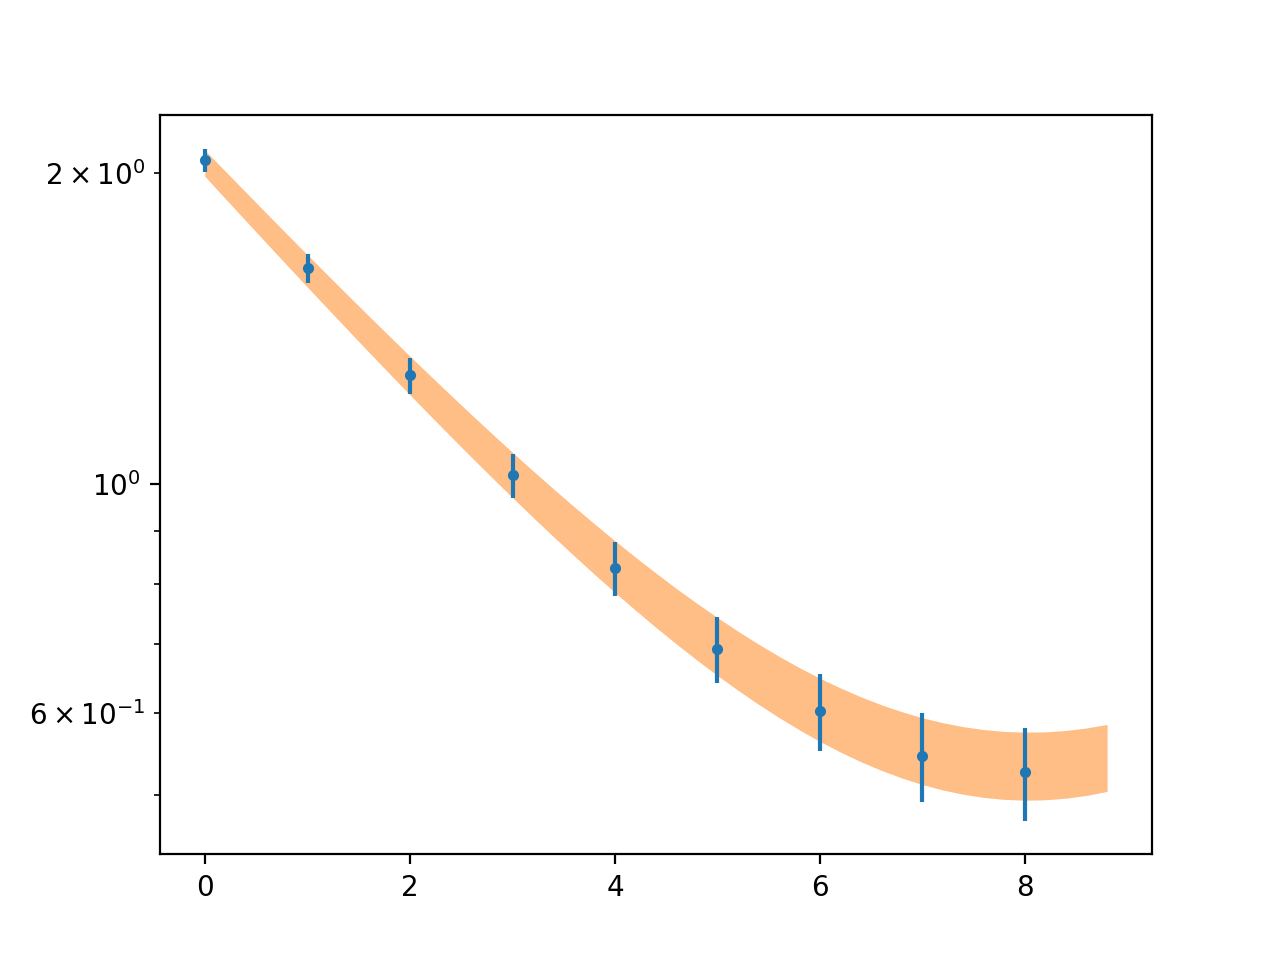

In [8]:
plt.figure()
[y,dy] = corr.error()
plt.errorbar(xax,y,dy,fmt='.',color='C0')

xax1=numpy.arange(0,9,0.2)
[yeval] = fit1.eval(xax1,pars)
[y,dy] = yeval.error()
plt.fill_between(xax1,y+dy,y-dy,lw=0.1,alpha=0.5,color='C1')

plt.yscale('log')

## Combined fits

Below we generate a second fake ensemble with the same parameters as before and then attempt a combined fit.

In [9]:
tau=5.6
N=8000

data = pyobs.random.acrandn(corr_ex,cov_ex,tau,N)
data = numpy.reshape(data, (numpy.size(data),))

corrB=pyobs.obs()
corrB.create('obsB',data,dims=(T//2+1,))

In [10]:
[_,dy] = corrB.error()
W=1./dy**2
fit2 = pyobs.mfit(xax,W,f1,df1,v='t')

pars = fit2(corrB)
print('fit1 = ', pars)
print('Ratio with true parameters:',pars/numpy.array(mass))

chisquare = 0.15374382940284098
minimizer iterations = 16
minimizer status: Levenberg-Marquardt: reached  1.0e-08 per-cent tolerance on x0
mfit.run executed in 0.0129368 secs
fit1 =  0.2536(62)

Ratio with true parameters: 1.014(25)



Below we perfom a combined fit. It is as simple as typing `fit1+fit2`. We can check the incresed precision on the fitted mass compared to the individual fits.

In [11]:
fit3 = fit1 + fit2

pars = fit3([corr,corrB])
print('fit1 = ', pars)
print('Ratio with true parameters:',pars/numpy.array(mass))

chisquare = 0.6937184114176357
minimizer iterations = 15
minimizer status: Levenberg-Marquardt: reached  1.0e-08 per-cent tolerance on x0
mfit.run executed in 0.0256069 secs
fit1 =  -0.2526(44)

Ratio with true parameters: -1.011(18)

